<a href="https://www.kaggle.com/code/goatlebron/nba-players-predictions?scriptVersionId=206449689" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Linear Regression - MSE: 5.064469391068096, R^2: 0.9299017956343941
Random Forest - MSE: 6.1284400479616306, R^2: 0.9151751921569464
              Player  Actual_PTS  Predicted_PTS_LR  Predicted_PTS_RF
1366       Ja Morant          14         10.571782             13.52
807   Jazian Gortman           0          0.333848              0.00
1514      Tari Eason          15         13.809238             17.49
29    Ariel Hukporti           0          1.286207              0.00
532    Amen Thompson           9         12.143725              8.11


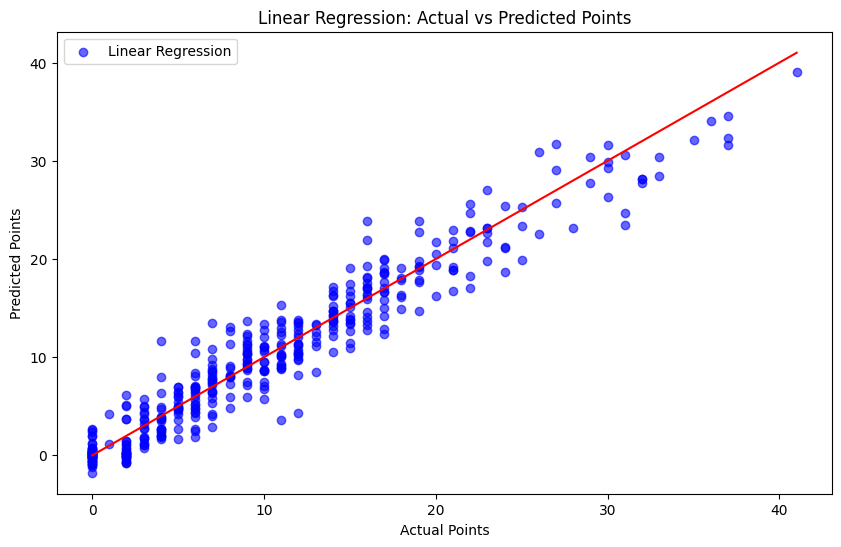

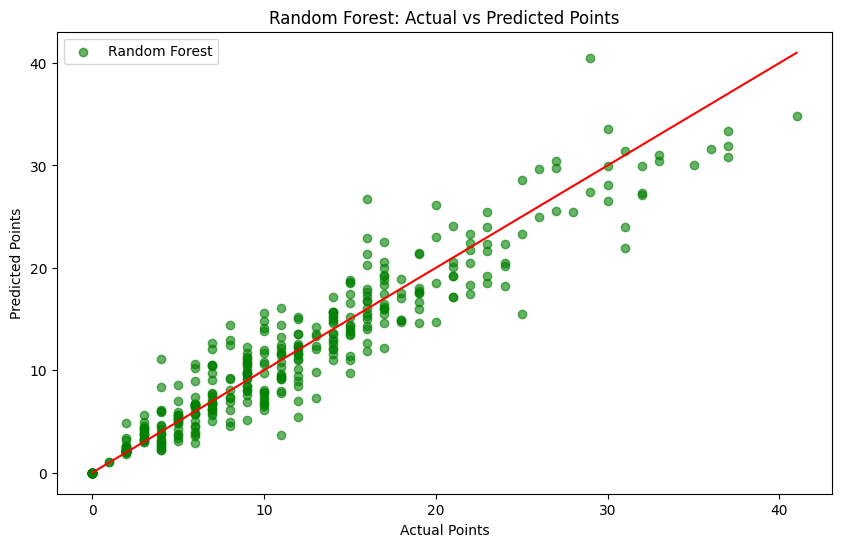

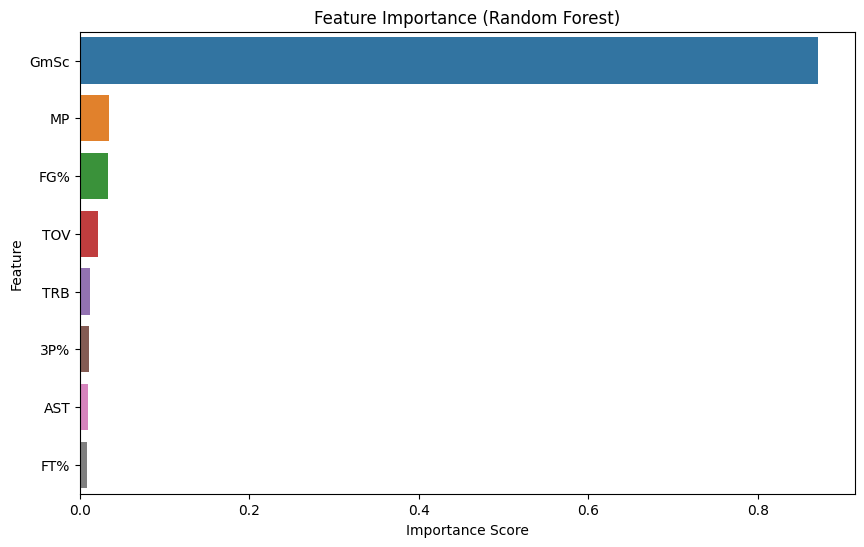

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

 # Step 1: Load and prepare the data
# Load the NBA dataset
data = pd.read_csv('/kaggle/input/nba-player-data-set/database_24_25.csv')


data = data.drop(columns=['Opp', 'Res', 'Data'], errors='ignore')

# Define features (X) and target (y) while keeping Player for later reference
X = data[['MP', 'FG%', '3P%', 'FT%', 'TRB', 'AST', 'TOV', 'GmSc']]
y = data['PTS']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


# Calculate and print performance metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {lr_mse}, R^2: {lr_r2}")
print(f"Random Forest - MSE: {rf_mse}, R^2: {rf_r2}")


# Copy X_test to avoid modifying the original test set
X_test = X_test.copy()
X_test['Actual_PTS'] = y_test.values  # Ensure alignment by using y_test.values
X_test['Predicted_PTS_LR'] = y_pred_lr  # Linear Regression predictions
X_test['Predicted_PTS_RF'] = y_pred_rf  # Random Forest predictions

# Add the Player column back for identification based on the original index
X_test['Player'] = data.loc[X_test.index, 'Player'].values


print(X_test[['Player', 'Actual_PTS', 'Predicted_PTS_LR', 'Predicted_PTS_RF']].head())

# Step 6: Visualize the results
# Plot Actual vs Predicted Points for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Actual_PTS'], X_test['Predicted_PTS_LR'], color='blue', alpha=0.6, label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Linear Regression: Actual vs Predicted Points')
plt.legend()
plt.show()

# Plot Actual vs Predicted Points for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Actual_PTS'], X_test['Predicted_PTS_RF'], color='green', alpha=0.6, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Random Forest: Actual vs Predicted Points')
plt.legend()
plt.show()


# Get feature importances from the Random Forest model
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
